<a href="https://colab.research.google.com/github/sarveshrastogi1/ML_Lab_1bm22cs247/blob/main/ml_lab_7_1bm22cs247.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

def load_data(csv_path="/content/iris (4).csv"):
    """
    Load the Iris dataset from a CSV file if available;
    otherwise fall back to sklearn's built‑in version.
    """
    try:
        df = pd.read_csv(csv_path)
        # Expecting a column named "species"
    except FileNotFoundError:
        iris = load_iris(as_frame=True)
        df = iris.frame
        df.rename(columns={'target': 'species'}, inplace=True)
    return df

def prepare_features(df):
    """
    Split dataframe into features X and target y.
    """
    X = df.drop('species', axis=1)
    y = df['species']
    return X, y

def evaluate_random_forest(X_train, X_test, y_train, y_test, n_estimators=10):
    """
    Train a Random Forest classifier with given n_estimators
    and return the test-set accuracy.
    """
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    return accuracy_score(y_test, preds)

def tune_n_estimators(X_train, X_test, y_train, y_test, start=10, stop=200, step=10):
    """
    Iterate over a range of n_estimators values, record accuracy for each,
    and return a DataFrame of results plus the best setting.
    """
    results = []
    for n in range(start, stop + 1, step):
        acc = evaluate_random_forest(X_train, X_test, y_train, y_test, n_estimators=n)
        results.append({'n_estimators': n, 'accuracy': acc})
    df_results = pd.DataFrame(results)
    best = df_results.loc[df_results['accuracy'].idxmax()]
    return df_results, int(best['n_estimators']), best['accuracy']

def main():
    # 1. Load and prepare data
    df = load_data("/content/iris (4).csv")
    X, y = prepare_features(df)

    # 2. Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # 3. Baseline with default n_estimators=10
    baseline_acc = evaluate_random_forest(X_train, X_test, y_train, y_test)
    print(f"Baseline accuracy (10 trees): {baseline_acc:.4f}")

    # 4. Hyperparameter tuning for n_estimators
    results_df, best_n, best_acc = tune_n_estimators(X_train, X_test, y_train, y_test)
    print(f"Best accuracy {best_acc:.4f} achieved with n_estimators = {best_n}")

    # 5. (Optional) Save the tuning results to CSV
    results_df.to_csv("rf_tuning_results.csv", index=False)
    print("Tuning results saved to rf_tuning_results.csv")

if __name__ == "__main__":
    main()


Baseline accuracy (10 trees): 1.0000
Best accuracy 1.0000 achieved with n_estimators = 10
Tuning results saved to rf_tuning_results.csv


Baseline accuracy (10 trees): 1.0000


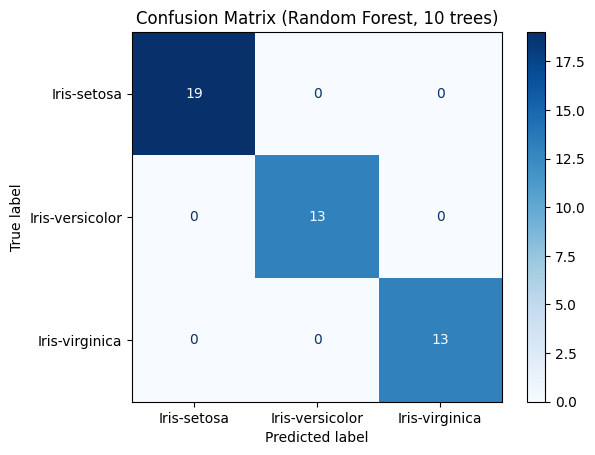

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def load_data(csv_path="/content/iris (4).csv"):
    """
    Load the Iris dataset from a CSV file if available;
    otherwise fall back to sklearn's built‑in version.
    """
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        iris = load_iris(as_frame=True)
        df = iris.frame
        df.rename(columns={'target': 'species'}, inplace=True)
    return df

def prepare_features(df):
    """
    Split dataframe into features X and target y.
    """
    X = df.drop('species', axis=1)
    y = df['species']
    return X, y

def main():
    # 1. Load and prepare data
    df = load_data("/content/iris (4).csv")
    X, y = prepare_features(df)

    # 2. Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # 3. Train Random Forest with default n_estimators=10
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # 4. Compute accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Baseline accuracy (10 trees): {acc:.4f}")

    # 5. Compute and display confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=rf.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (Random Forest, 10 trees)")
    plt.show()

if __name__ == "__main__":
    main()
